# 2019-yil uchun "8 mkr" supermarketidagi savdo holati

In [1]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [35]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/8%20mkr.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,NES 10KG UN,Un,5.75,2019-09-14,True
1,BOSTAN 5KG XIYAR TURSU,Tuzlamalar,11.25,2019-09-14,True
2,AZER SUD 700GR KEND QATIGI 1.5% S/Q,Qatiq,1.57,2019-09-14,True
3,YASHKINO 290GR VAFLI GOLLANDSKIYE S KARAMELNOY,Shirinliklar,1.40,2019-09-14,True
4,MVT.NAR GULOYSE KG,Mevalar,1.55,2019-09-14,True
5,DENLI DUYU UZUN TAMASHAEE BASMATI KG,Donli mahsulotlar,3.50,2019-09-14,True
6,KOLBASA H.N.OXOT/DEREVENSKI KG,Kolbasa va sosiskalar,10.95,2019-09-14,True
7,BIONOVA 100GR CIKORIY RASTV.S SIPOVNIKOM PAKET,Diabet mahsulotlari,4.10,2019-01-04,True
8,GALLINA BLANCA 52GR SUP QRIBNOY S LAPSOY POSET,Ziravorlar,0.80,2019-01-04,True
9,YAPRAK 15GR QARA ISTIOT UYUDULMUS PAKET,Ziravorlar,0.70,2019-01-04,True


In [36]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20130 non-null  object 
 1   mahsulot_turi   20130 non-null  object 
 2   mahsulot_narhi  20130 non-null  float64
 3   sotilgan_vaqti  20130 non-null  object 
 4   bonus_karta     20130 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 648.8+ KB


In [37]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [38]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20130 non-null  object        
 1   mahsulot_turi   20130 non-null  object        
 2   mahsulot_narhi  20130 non-null  float64       
 3   sotilgan_vaqti  20130 non-null  datetime64[ns]
 4   bonus_karta     20130 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 648.8+ KB


In [39]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2013
1883
2129
1827
2015
2009
2118
1931
2073
2128
4
0


In [40]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2013
1883
2129
1827
2015
2009
2118
1931
2073
2128
0
0


In [41]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,NES 10KG UN,Un,5.75,2019-09-14,True
1,BOSTAN 5KG XIYAR TURSU,Tuzlamalar,11.25,2019-09-14,True
2,AZER SUD 700GR KEND QATIGI 1.5% S/Q,Qatiq,1.57,2019-09-14,True
3,YASHKINO 290GR VAFLI GOLLANDSKIYE S KARAMELNOY,Shirinliklar,1.40,2019-09-14,True
4,MVT.NAR GULOYSE KG,Mevalar,1.55,2019-09-14,True
...,...,...,...,...,...
20125,TESS 25X1.5GR YASIL CAY LIME QUTU,Choy,1.87,2019-03-19,True
20126,ABC 3L YUMSALDICI GUL TUTKUSU,"Yuvish vositalari, tozalagichlar",6.95,2019-03-19,True
20127,BELLO 1LT SOFT YUMSALDICI DAHA DA QARA,"Yuvish vositalari, tozalagichlar",2.70,2019-03-19,True
20128,OREO 96GR PECENYE COCOA FILLING,Shirinliklar,1.75,2019-04-02,False


In [43]:
#9 2019-yilda "8 mkr" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4569
Maishiy buyumlar,1130
"Yuvish vositalari, tozalagichlar",1021
Mevali sharbatlar,966
Idish-tovoq,815
...,...
Tayyor ovqatlar,23
Kefir,15
Shampan,12
Suzma,11


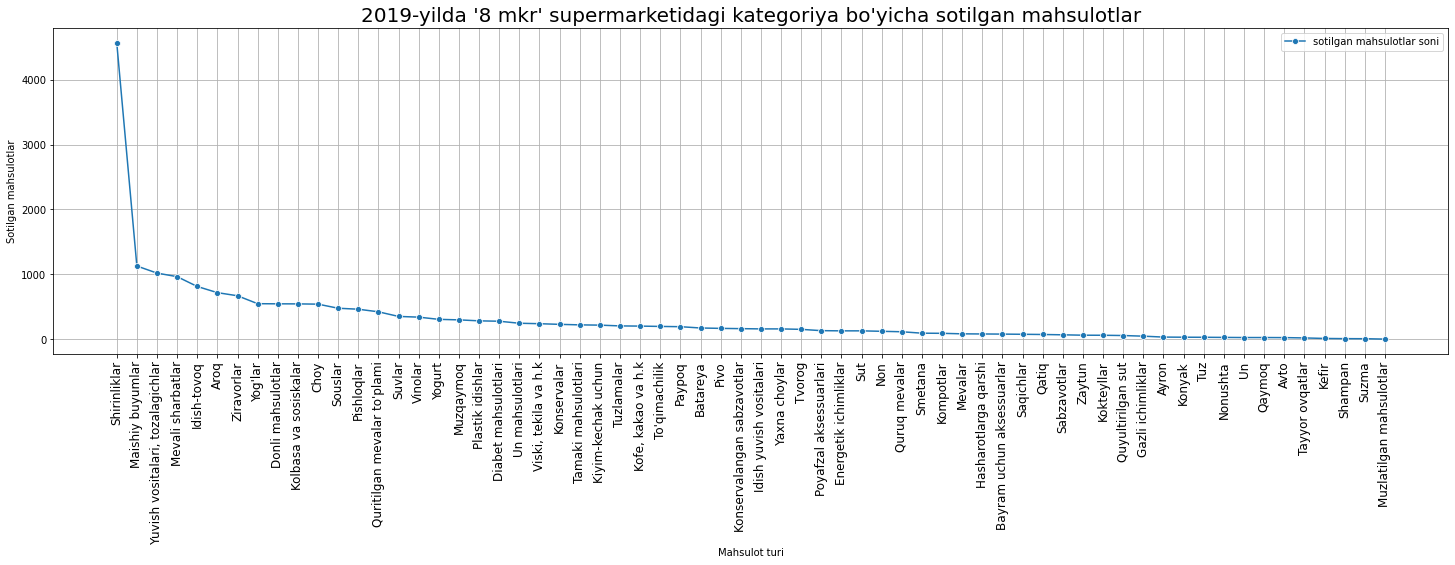

In [44]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda '8 mkr' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [45]:
#10 2019-yilda "8 mkr" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10571.71
Avto,145.05
Ayron,27.10
Batareya,826.74
Bayram uchun aksessuarlar,222.18
...,...
Yog'lar,5077.14
Yogurt,389.47


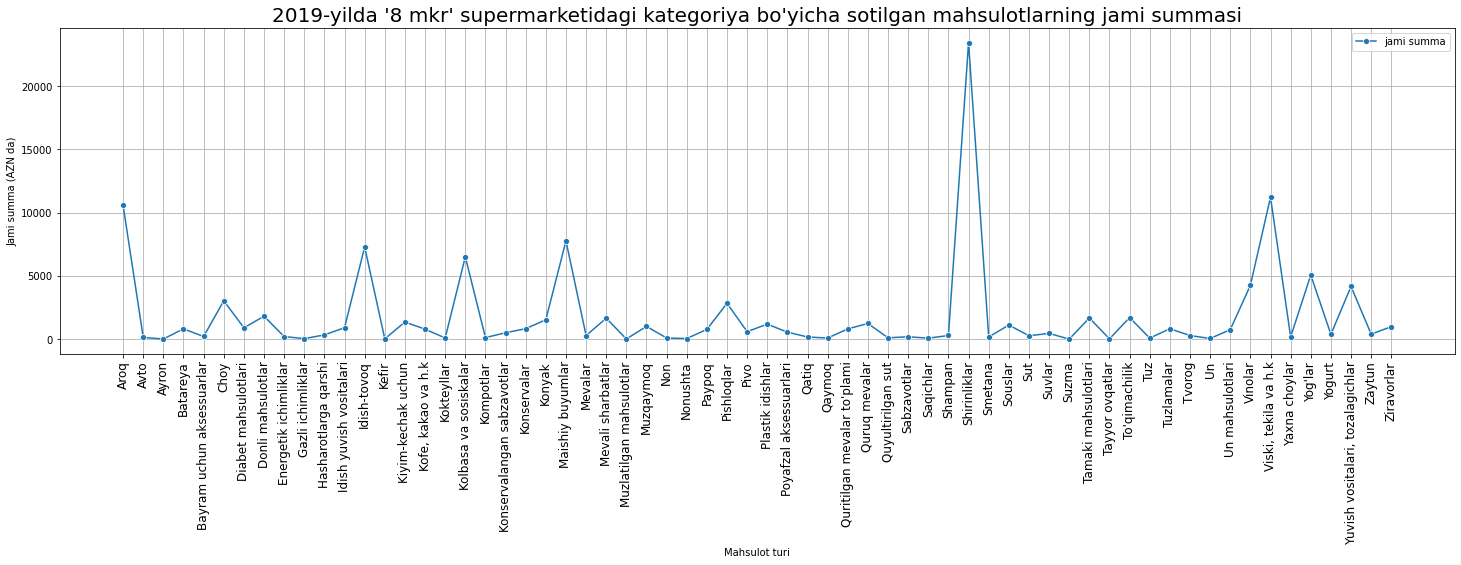

In [46]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda '8 mkr' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [47]:
#11 2019-yilda "8 mkr" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10155,9971


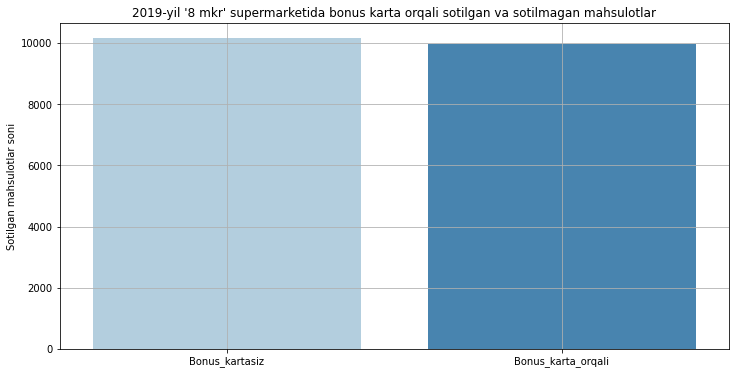

In [48]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil '8 mkr' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [49]:
#12 2019-yilda "8 mkr" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2013
Fevral,1883
Mart,2129
Aprel,1827
May,2015
Iyun,2009
Iyul,2118
Avgust,1931
Sentabr,2073
Oktabr,2128


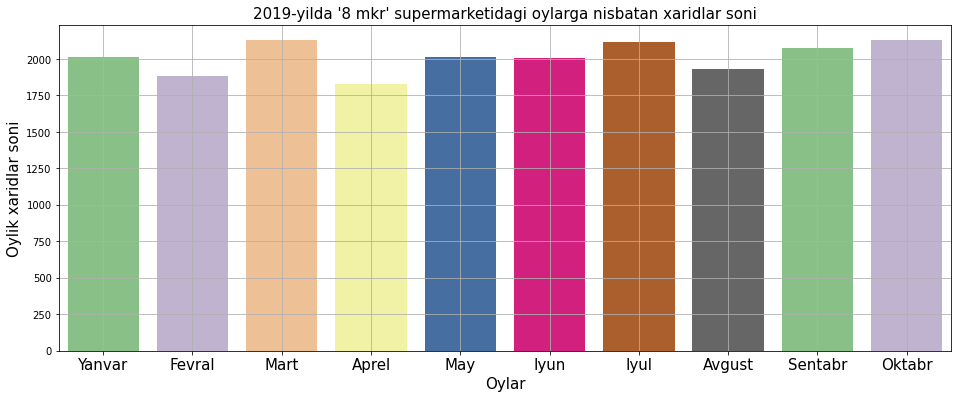

In [50]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda '8 mkr' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [51]:
#13 2019-yilda "8 mkr" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2701
Seshanba,2738
Chorshanba,3054
Payshanba,2830
Juma,2940
Shanba,2851
Yakshanba,3012


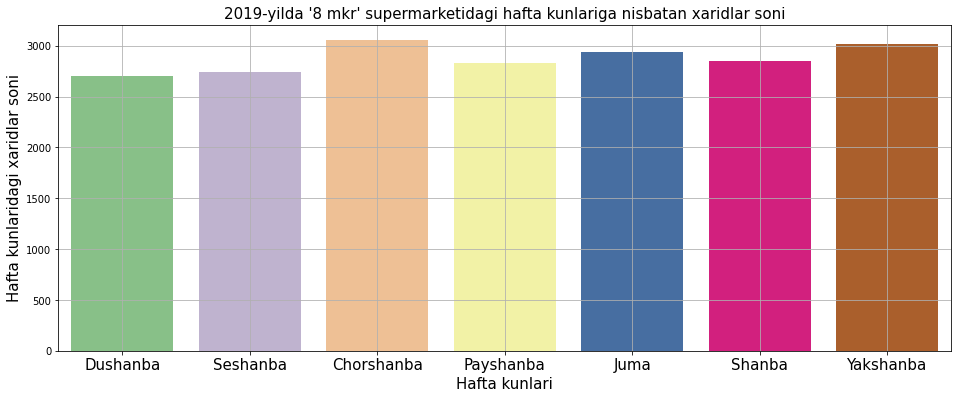

In [52]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda '8 mkr' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [53]:
#14 2019-yilda "8 mkr" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,717
2,759
3,574
4,651
5,669
6,779
7,574
8,797
9,606
10,638


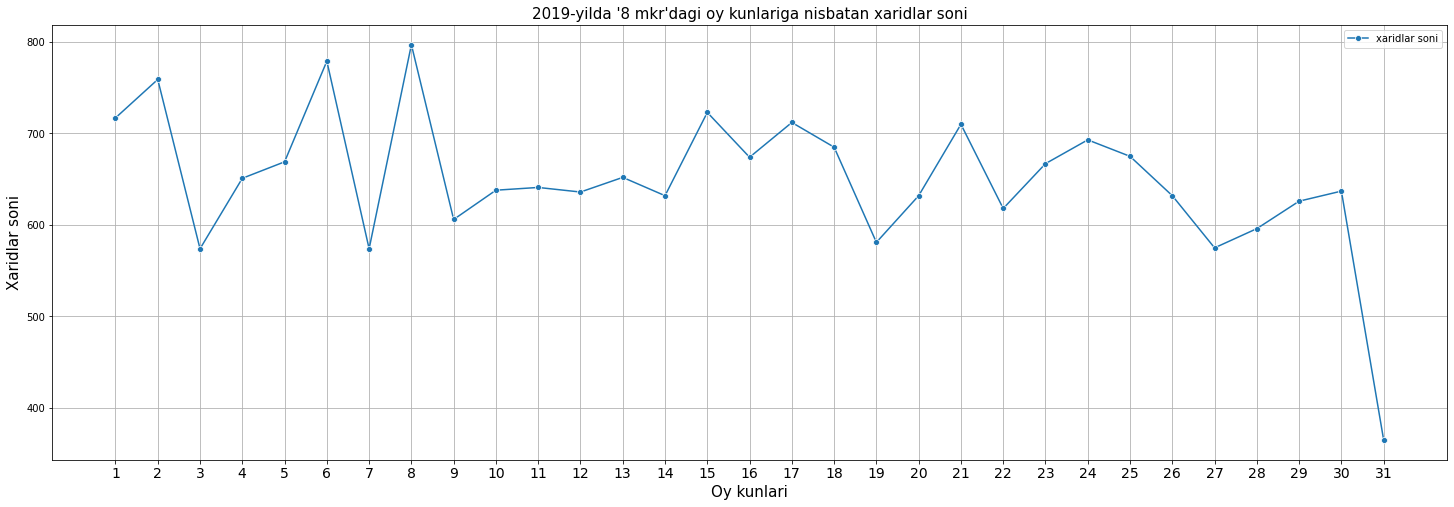

In [54]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda '8 mkr'dagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [55]:
#15 2019-yil '8 mkr' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [56]:
len(oy_sanalari)

310

In [57]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [58]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [59]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,48,62,51,65,80,91,48,59,47,62,56,57,82,52,96,78,75,80,43,65,72,39,107,69,41,56,71,45,48,111,57
Fevral,79,57,70,54,100,74,44,91,33,64,45,43,47,86,114,108,75,91,53,94,60,66,43,46,48,31,63,104,0,0,0
Mart,74,54,61,86,66,106,60,62,27,111,124,69,67,74,59,65,71,42,65,96,64,31,71,70,55,41,51,49,130,77,51
Aprel,83,103,44,30,35,39,70,62,55,36,42,64,61,76,53,59,67,50,59,40,96,71,84,73,66,92,44,53,53,67,0
May,80,83,52,70,33,73,51,72,54,60,36,105,19,41,73,62,63,70,81,70,74,65,65,88,68,88,70,69,63,42,75
Iyun,90,52,94,52,34,70,34,126,53,61,71,60,77,50,80,56,47,71,63,60,40,97,64,73,71,72,38,84,84,85,0
Iyul,75,82,37,108,83,102,92,105,93,53,96,59,68,41,45,70,69,52,53,53,111,30,36,74,107,63,36,48,74,40,63
Avgust,27,68,58,57,74,61,52,69,94,74,65,59,91,67,95,65,113,74,35,37,39,50,65,46,45,78,52,51,44,59,67
Sentabr,99,97,56,79,71,97,72,69,41,46,52,65,59,80,47,35,43,72,64,86,91,103,69,78,97,49,81,40,74,61,0
Oktabr,62,101,51,50,93,66,51,82,109,71,54,55,81,65,61,76,89,83,65,31,63,66,63,76,77,62,69,53,56,95,52


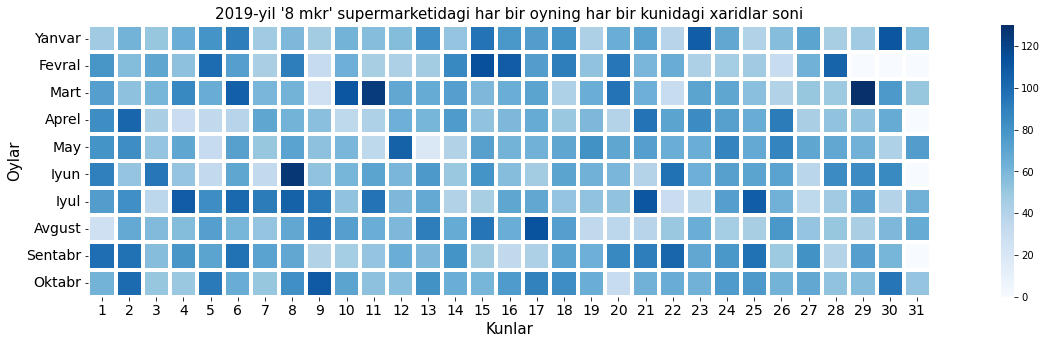

In [60]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil '8 mkr' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

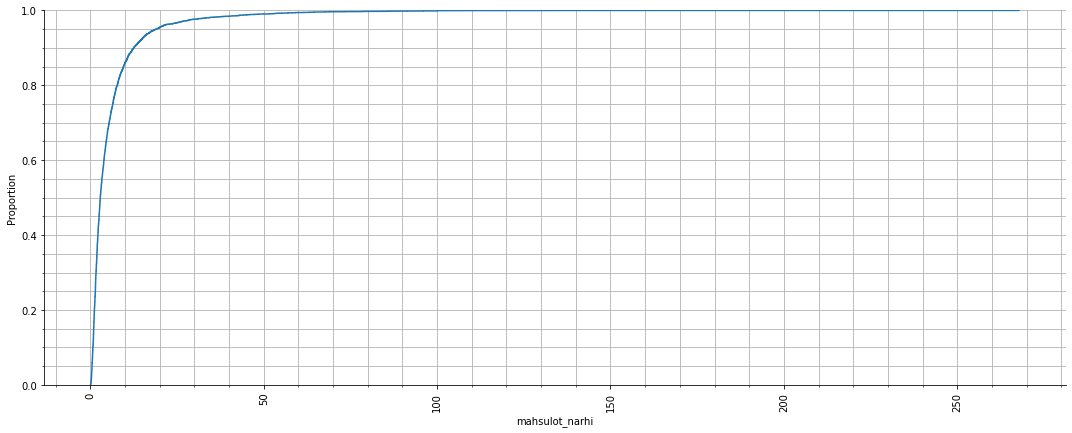

In [62]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()